In [1]:
import math
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta
from scipy.integrate import quad
from scipy.optimize import root_scalar, minimize_scalar
from sympy import I
from IPython.display import display, HTML

In [2]:
N = 6.022E23
k = 1.381E-23
R = N*k
n = 1
T = np.linspace(3.5, 6, 5)
a = 16.02   #ACETONE
b = 0.1124

min = n*b+1E-4
V = np.linspace(min,10, 25000)
P = np.zeros((T.size,V.size))
def P_(V,T): return (n*R*T)/(V-n*b) - (a*n**2)/V**2
for i in range(T.size):
    P[i] = P_(V, T[i])

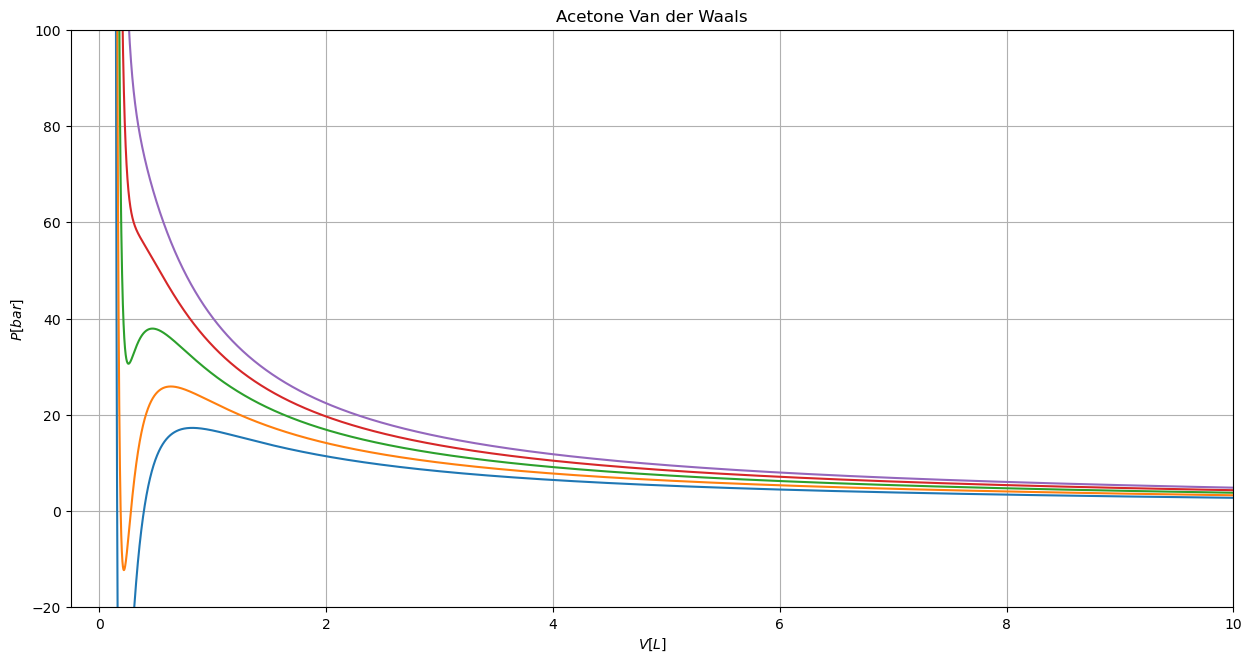

In [3]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$V [L]$', ylabel='$P [bar]$', ylim=(-20, 100), xlim=(-0.25, 10), title='Acetone Van der Waals')
ax0.grid()
for i in range(T.size):
    ax0.plot(V, P[i,:])

In [4]:
i = 2
G = -n*R*T[i]*np.log(V-n*b)+((n**2*R*T[i]*b)/(V-n*b))-((2*a*n**2)/V)

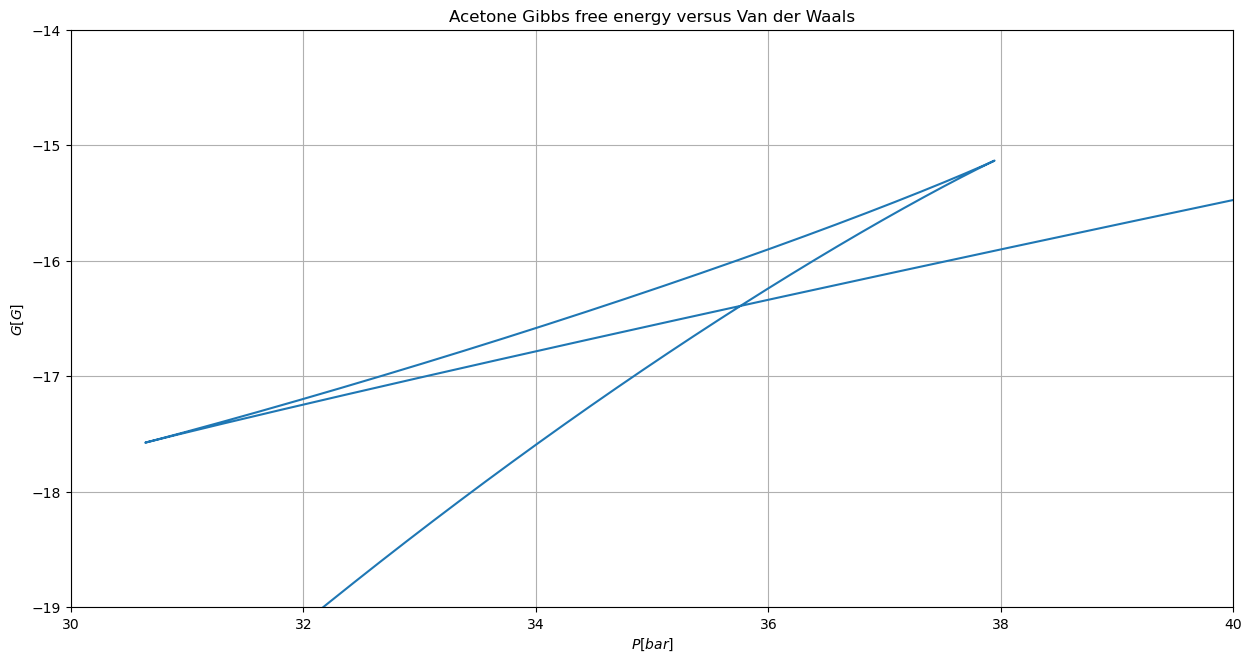

In [5]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$P [bar]$', ylabel='$G [G]$', ylim=(-19, -14), xlim=(30, 40), title='Acetone Gibbs free energy versus Van der Waals')
ax0.grid()
ax0.plot(P[i], G)

## Find lower isotherm

Focusing in on the lowest temerature for which the Van der Waals plot approaches zero


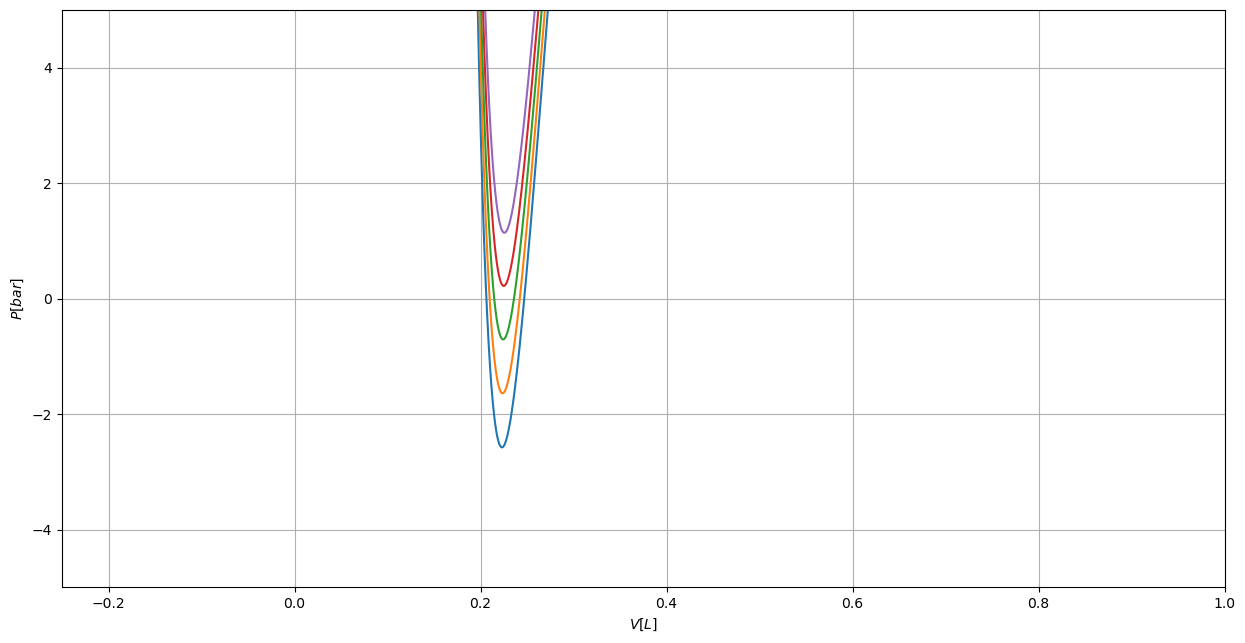

In [6]:
N = 6.022E23
k = 1.381E-23
R = N*k
n = 1
T = np.linspace(4.25, 4.3, 5)
a = 16.02   #ACETONE
b = 0.1124

min = n*b+1E-4
V = np.linspace(min,10, 25000)
P = np.zeros((T.size,V.size))
def P_(V,T): return (n*R*T)/(V-n*b) - (a*n**2)/V**2
for i in range(T.size):
    P[i] = P_(V, T[i])

fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$V [L]$', ylabel='$P [bar]$', ylim=(-5, 5), xlim=(-0.25, 1))
ax0.grid()
for i in range(T.size):
    ax0.plot(V, P[i,:])
print('Focusing in on the lowest temerature for which the Van der Waals plot approaches zero')

In [7]:
min = n*b+1E-4
V = np.linspace(min,10, 25000)
T = np.linspace(4.25, 4.3, 500)
for i in range(T.size):
    P = P_(V, T[i])
    if P.min() > 0:
        T_lower = T[i]
        break

T lower therm = 4.285 K


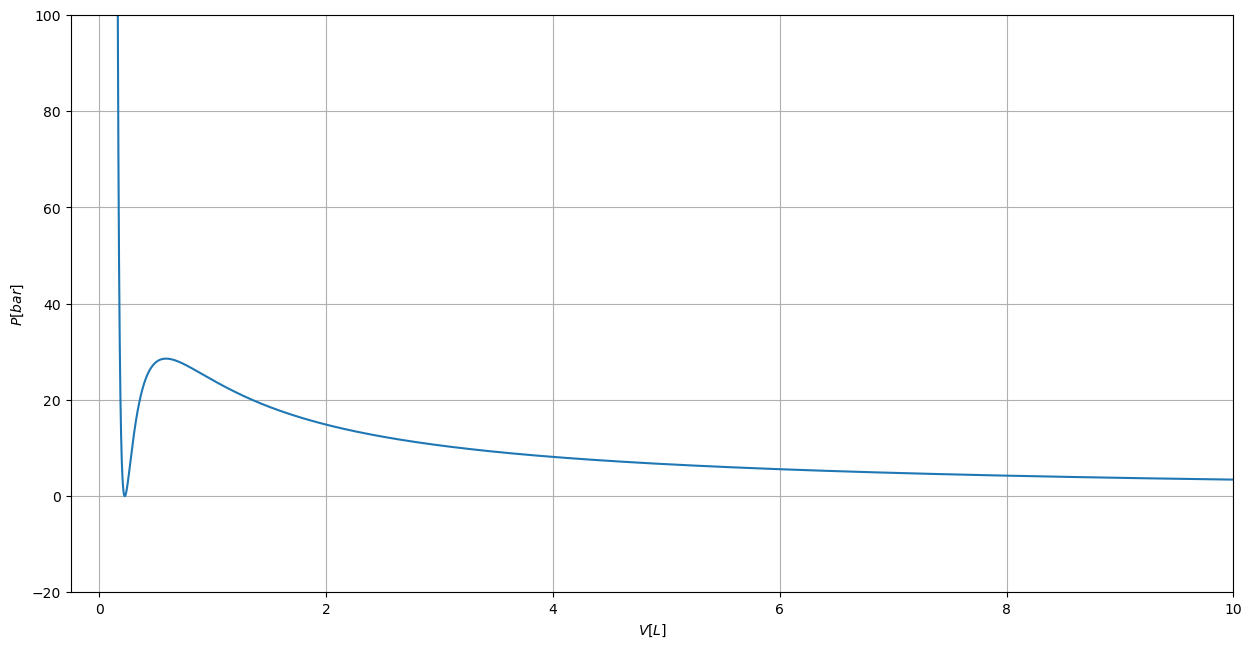

In [8]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$V [L]$', ylabel='$P [bar]$', ylim=(-20, 100), xlim=(-0.25, 10))
ax0.grid()
ax0.plot(V, P)
print ('T lower therm = {0:0.3f} K'.format(T_lower))

## Find upper iostherm

Focusing in on the lowest isotherm for which there is only one point of inflection from the minimum volume to infinity b < V < inf.


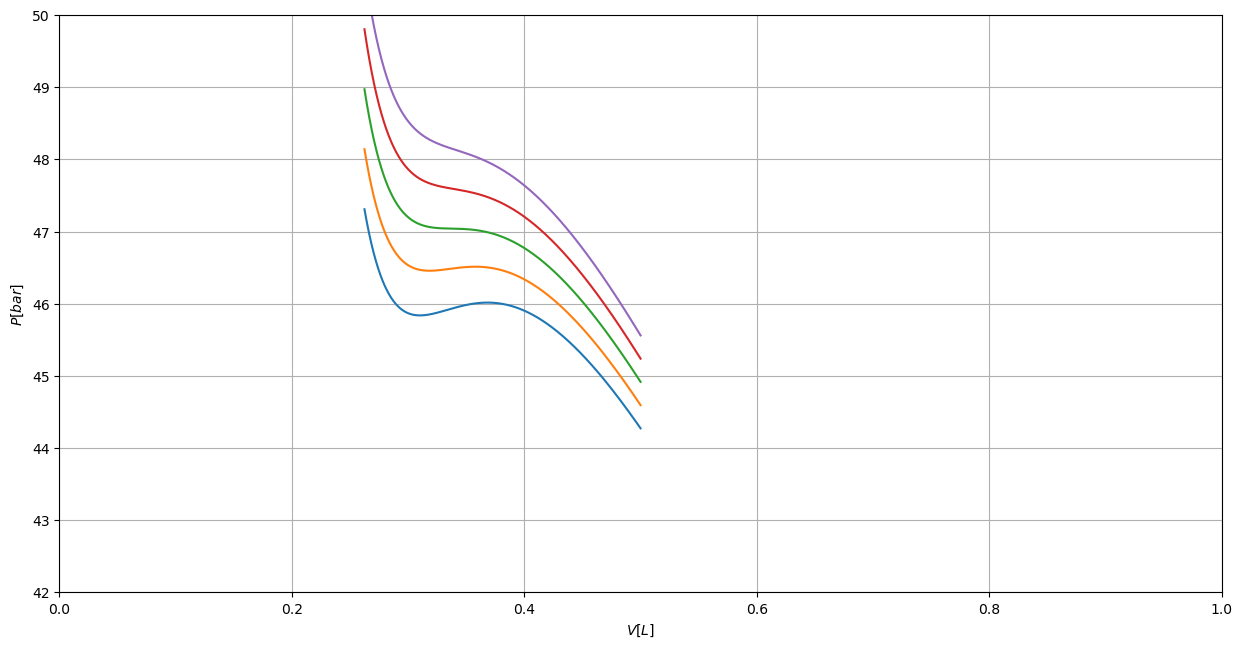

In [9]:
N = 6.022E23
k = 1.381E-23
R = N*k
n = 1
T = np.linspace(5.05, 5.11, 5)
a = 16.02   #ACETONE
b = 0.1124

min = n*b+1E-4
V = np.linspace(min+0.15, 0.5, 25000)
P = np.zeros((T.size,V.size))
def P_(V,T): return (n*R*T)/(V-n*b) - (a*n**2)/V**2
for i in range(T.size):
    P[i] = P_(V, T[i])

fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$V [L]$', ylabel='$P [bar]$', ylim=(42, 50), xlim=(0, 1))
ax0.grid()
for i in range(T.size):
    ax0.plot(V, P[i,:])

print('Focusing in on the lowest isotherm for which there is only one point of inflection from the minimum volume to infinity b < V < inf.')

In [10]:
min = n*b+1E-4
T = np.linspace(5.05, 5.11, 500)
V = np.linspace(min+0.15, 0.5, 25000)
for i in range(T.size):
    P = P_(V, T[i])
    d = 0
    for j in range(V.size-1):
        if P[j+1] > P[j]:
            d = 1
    if d == 0:
        T_upper = T[i]
        break

T upper therm = 5.078 K


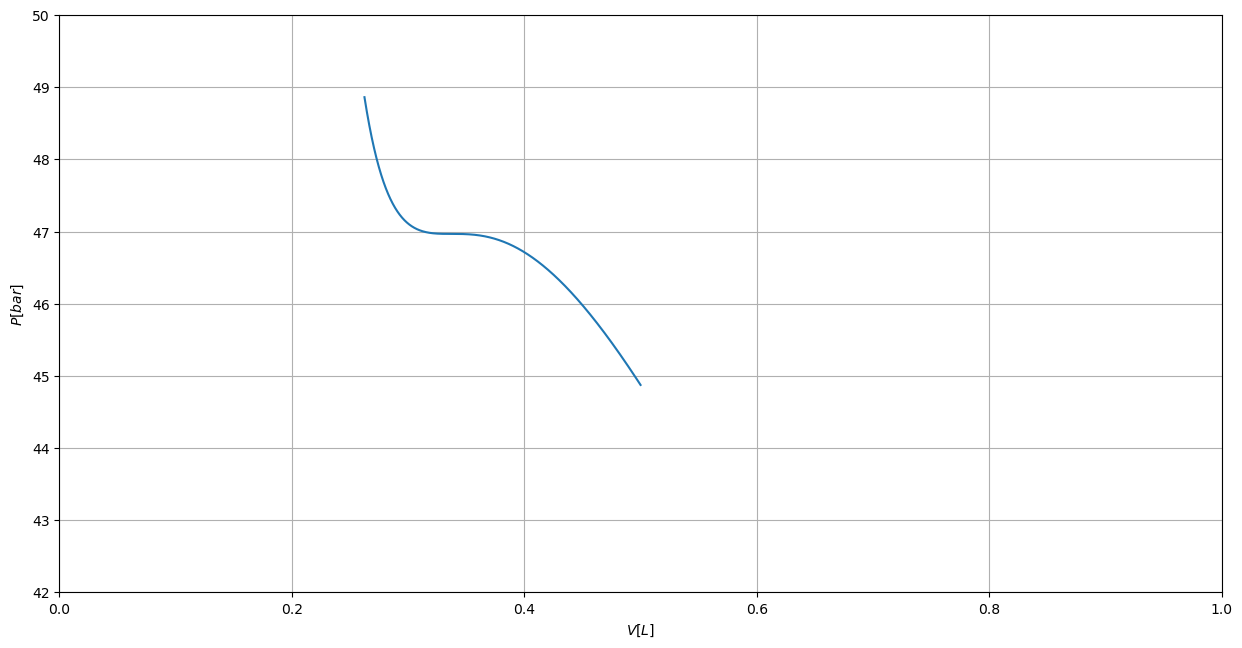

In [11]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$V [L]$', ylabel='$P [bar]$', ylim=(42, 50), xlim=(0, 1))
ax0.grid()
ax0.plot(V, P)
print ('T upper therm = {0:0.3f} K'.format(T_upper))

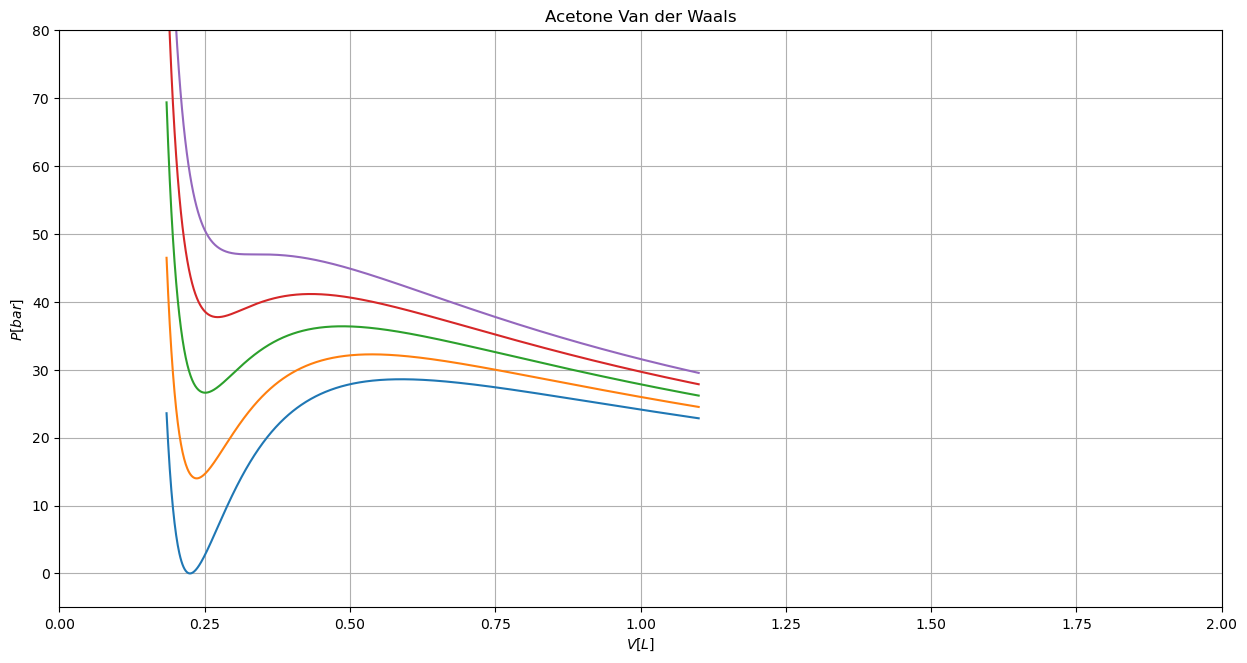

In [44]:
N = 6.022E23
k = 1.381E-23
R = N*k
n = 1
T = np.linspace(T_lower, T_upper-1E-4, 5)
a = 16.02   #ACETONE
b = 0.1124

min = n*b+1E-4
V = np.linspace(min+0.072, 1.1, 1000)
P = np.zeros((T.size,V.size))
def P_(V,T): return (n*R*T)/(V-n*b) - (a*n**2)/V**2
for i in range(T.size):
    P[i] = P_(V, T[i])

fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$V [L]$', ylabel='$P [bar]$', ylim=(-5, 80), xlim=(0, 2), title='Acetone Van der Waals')
ax0.grid()
for i in range(T.size):
    ax0.plot(V, P[i,:])

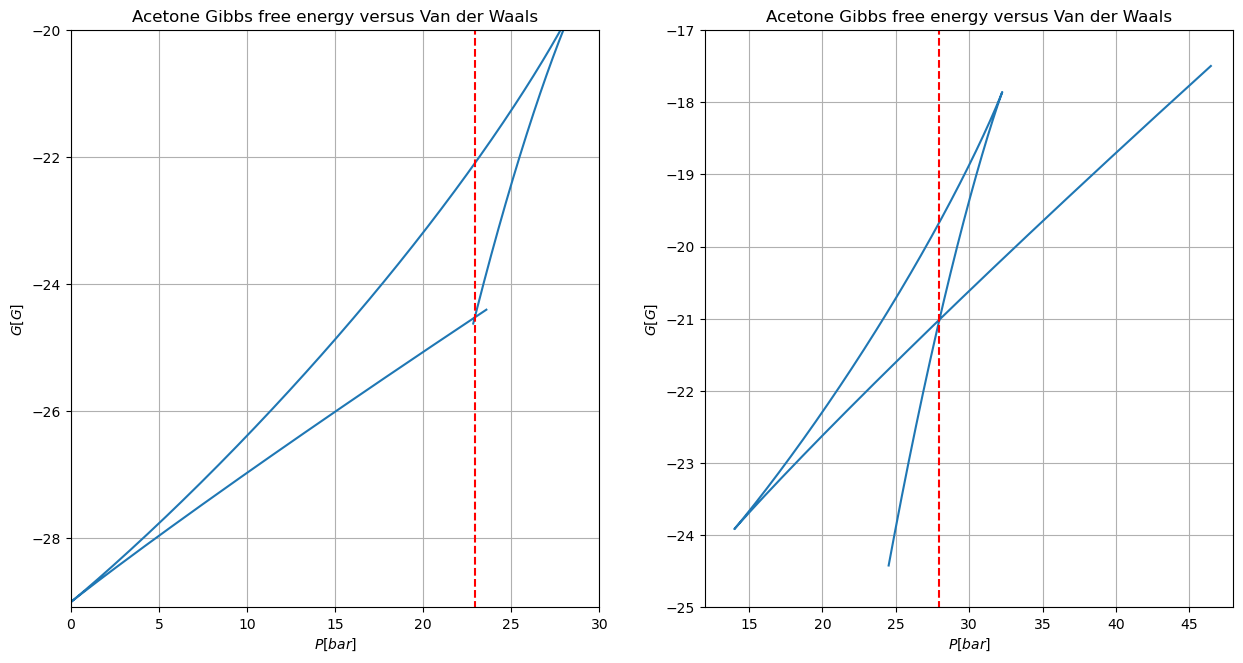

In [54]:
G = np.zeros((T.size,V.size))
for i in range(T.size):
    G[i] = -n*R*T[i]*np.log(V-n*b)+((n**2*R*T[i]*b)/(V-n*b))-((2*a*n**2)/V)
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 2, 1, xlabel='$P [bar]$', ylabel='$G [G]$', xlim=(0,30), ylim=(-29.1, -20), title='Acetone Gibbs free energy versus Van der Waals')
ax0.grid()
ax0.plot(P[0,:], G[0,:])
ax0.vlines(22.92930656, -100, 100, color='red', linestyles='dashed')
ax0 = fig.add_subplot(1, 2, 2, xlabel='$P [bar]$', ylabel='$G [G]$', xlim=(12, 48), ylim=(-25, -17), title='Acetone Gibbs free energy versus Van der Waals')
ax0.grid()
ax0.plot(P[1,:], G[1,:])
ax0.vlines(27.96968507, -100, 100, color='red', linestyles='dashed')

In [14]:
p_max = P_(V[0], T[1])
p_min = P_(V[-1], T[1])
p_max
p_min

46.46190260243776

24.509983895777854

### Find volumes for points 3 and 5

In [63]:
min = n*b+1E-4
T = np.linspace(T_lower, T_upper-1E-4, 50)
V = np.linspace(min+0.072, 1.1, 10000)
v3 = np.zeros(T.size)
v5 = np.zeros(T.size)
for i in range(T.size):
    P = P_(V, T[i])
    v5_check = 0
    for j in range(V.size-1):
        if P[j+1] > P[j] and v5_check == 0:
            v5[i] = V[j]
            v5_check = 1
            continue
        if P[j+1] < P[j] and v5_check == 1:
            v3[i] = V[j]
            break

In [66]:
def v_mid(p_max, p_min, v5, v3, V, T):  ### FIND THREE VOLUMES THAT CORRESPOND TO THE SAME PRESSURE
    p_mid = (p_max + p_min)/2           ### POINTS 2, 4, AND 6
    v6 = v_find(p_mid, V[0], v5, T)
    v4 = v_find(p_mid, v5, v3, T)
    v2 = v_find(p_mid, v3, V[-1], T)
    return v6, v4, v2

def v_find(p, vi, vf, T):               ### BINARY SEARCH FOR PRESSURE CORDINATE BETWEEN TWO VOLUMES
    s = np.linspace(vi, vf, 100000)
    thresh = 1E-6
    if P_(vi, T) > P_(vf, T):
        if abs(abs(P_(s[0], T)) - abs(p)) < thresh:
            v = s[0]
            return v
        if abs(abs(P_(s[-1], T)) - abs(p)) < thresh:
            v = s[-1]
            return v
        s_max = s[0]
        s_min = s[-1]
        for j in range(s.size):
            s_mid = (s_max + s_min)/2
            if abs(abs(P_(s_mid, T)) - abs(p)) < thresh:
                v = s_mid
                break
            elif P_(s_mid, T) > p:
                s_max = s_mid
            elif P_(s_mid, T) < p:
                s_min = s_mid
                
    if P_(vi, T) < P_(vf, T):
        if abs(abs(P_(s[0], T)) - abs(p)) < thresh:
            v = s[0]
            return v
        if abs(abs(P_(s[-1], T)) - abs(p)) < thresh:
            v = s[-1]
            return v
        s_max = s[-1]
        s_min = s[0]
        for j in range(s.size):
            s_mid = (s_max + s_min)/2
            if abs(abs(P_(s_mid, T)) - abs(p)) < thresh:
                v = s_mid
                break
            elif P_(s_mid, T) > p:
                s_max = s_mid
            elif P_(s_mid, T) < p:
                s_min = s_mid
    return v

def diff_(v6, v4, v2, T, p):                    ### RETURN THE DIFFERENCE BETWEEN THE TWO AREAS OF THE MAXWELL CONSTRUCTION
    A1, A1_err = quad(P_, v6, v4, args = (T,))
    A2, A2_err = quad(P_, v4, v2, args = (T,))
    diff = (p*(v4-v6) - A1) - (A2 - p*(v2-v4))
    return diff

In [67]:
diff = 1
p = np.zeros(T.size)
v6 = V[0]
v2 = V[-1]

for i in range(T.size):             ### FIND ALL PRESSURES THAT CORRESPOND TO POINTS 2, 4, AND 6
    diff = 1
    p_max = P_(V[0], T[i])
    p_min = P_(V[-1], T[i])
    if p_max > P_(v3[i], T[i]):
        p_max = P_(v3[i], T[i])
    if p_min < P_(v5[i], T[i]):
        p_min = P_(v5[i], T[i])
    while abs(diff) > 1E-5:
        
        v6, v4, v2 = v_mid(p_max, p_min, v5[i], v3[i], V, T[i])
        p[i] = P_(v4, T[i])
        diff = diff_(v6, v4, v2, T[i], p[i])
            
        if diff > 0:
            p_max = (p_max + p_min)/2
        if diff < 0:
            p_min = (p_max + p_min)/2

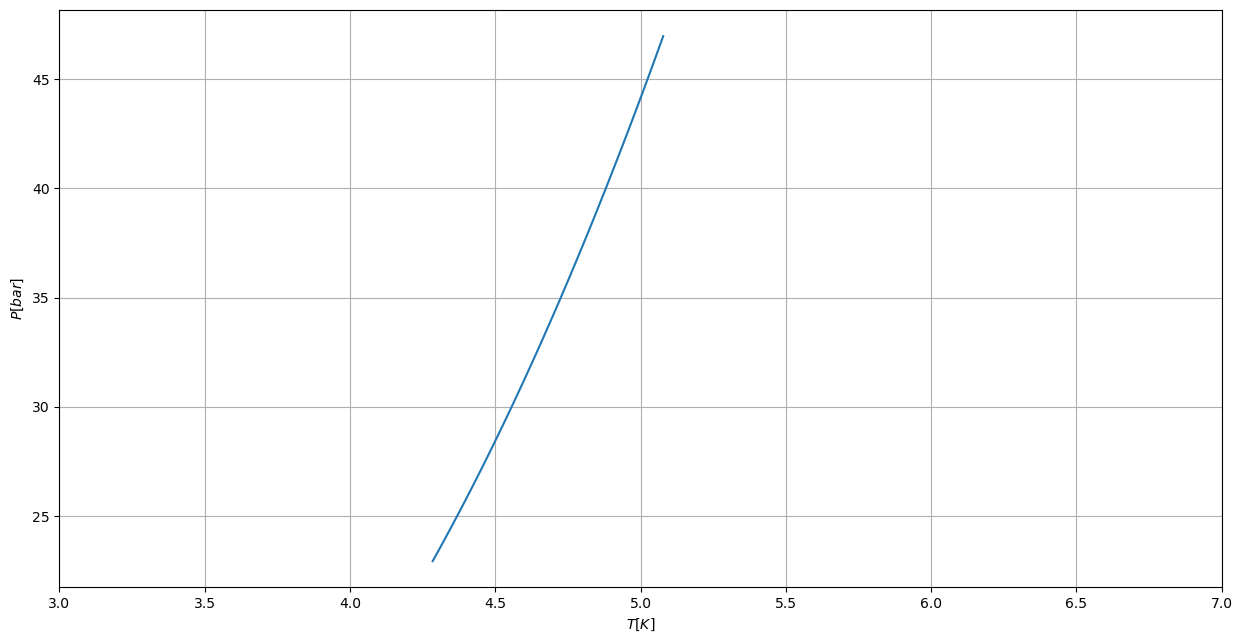

In [62]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$T [K]$', ylabel='$P [bar]$', xlim = (3,7))
ax0.grid()
ax0.plot(T, p)